# Chapter 1: Exploratory data analysis

- Classcal statistics
    - Focused almos exclusively on inference;
    - Complex set of procedures for drawing conclusions about large populations based on small samples.
- Data analysis
    - Tukey's 1977 book:
        - Exploratory data analysis.
    - Statistical inferece is just on component;
    - Links with engineering and computer science;
    - Availability of computing power evolved data analysis beyond its original scope;
    - David Donoho article 2015.

## Elements of structure data

### Two types of data:
- Numeric data:
    - Data expressed on a numeric scale;
    - Continuous:
        - Can take any value (float).
    - Discrete:
        - Only integer values (int).
- Categorical:
    - Can take only specific set of values;
    - Represent a set of possible categories:
        - Binary:
            - Just two categories (bool).
        - Ordinal:
            - Data has an ordering factor.

### Key ideas:
- Data is tipically classified in software by type;
- Data types include numeric and categorical;
- Data typing in software acts as a signal to the software on how to process the data.

### Rectangular data

Key terms:
- Dataframe:
    - Rectangular data (spreadsheet) is the basic data structure for statistical and machine learning models.
- Feature:
    - A column within a table is commonly referred to as a feature:
        - Atribute, input, predictor, variable.
- Outcome:
    - Data science projects involve predicting an outcome;
    - Features ar used to predict the outcome in an experiment;
    - Synonyms: dependent variable, response, target, output.
- Records:
    - A row with the table;
    - Synonyms: case, example, instance, obsercation, patter, sample.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.DataFrame(
    {
        1: {
            'Category' : 'Music/Movie/Game',
            'currency' : 'US',
            'sellerRating' : 3249,
            'Duration' : 5,
            'endDay' : 'Mon',
            'ClosePrice' : 0.01,
            'OpenPrice' : 0.01,
            'Competitive?' : 0,
        },
        2: {
            'Category' : 'Automotive',
            'currency' : 'US',
            'sellerRating' : 3115,
            'Duration' : 7,
            'endDay' : 'Tue',
            'ClosePrice' : 0.01,
            'OpenPrice' : 0.01,
            'Competitive?' : 0,
        }
    }
).T

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Automotive,US,3115,7,Tue,0.01,0.01,0


## Data frames and indexes

- Databases have one or mode columns designated as indexes;
- Essentially a row number.

### Nonrectangular data strucutres

- Time series:
    - Sucessive measurements of the same variable;
    - Indexed by a date/time value;
    - Key cinoibebte for internet of things.
- Spatial data structures:
    - Used for mapping and location analytics;
    - More complex than rectangular data.
- Graph or network:
    - Used to represent physical, social and abstract relationships.


## Estimates of location

- Variables with measured or count data might have thousands of distinct values;
- A basic step is getting a tipic value for each feature.

Key terms for estimates of location:
- Mean:
    - The sum of all values divided by the number of values;
    - Synonym: avarage.
- Weighted mean:
    - The sum of all values divided by the sum of the weights;
    - Synonym: weighted average.
- Median:
    - The value such that one-half of the data lies above and below;
    - Synonym: 50th percentile.
- Percentile:
    - The value such that $P$ percent of the data lies below;
    - Synonym: quantile.
- Weighted median:
    - The value such one-half of the sum of the weights lies above and below the sorted data.
- Trimmed mean:
    - The average of all values after dropping a fixed number of extreme values;
    - Synonym: truncated mean.
- Robust:
    - Not sensitive to extreme values;
    - Synonym: resistant.
- Outlier
    - A data value that is very different from most of the data;
    - Synonym: extreme value.

### Mean

$$
    \bar{x}_t = \frac{
            \sum_{i = 1}^{n}{
                x_i
            }
        }
        {
            n
        }
$$

### Trimmed mean

- A variation of the mean;
- Calculate by dropping a fixed number of sorted values at each end and then taking a average of the remaining values;
- Eliminates the influence of extreme values.


$$
    \bar{x} = \frac{
            \sum_{i = p + 1}^{n - p}
            {
                x_i
            }
        }
        {
            n - 2p
        }
$$

### Weighted mean

- Calculated by multiplying each value $x_i$ by a user-specified weight $w_i$ and divided by the sum of the weights;
- Motivations:
    - Some values are instrinsically more variable than others and must recieve a lower weight;
    - The data collect does not equally representes the different groups that are interested in measuring.

$$
    \bar{x}_w = \frac{
            \sum_{i = 1}^{n}
            {
                w_i x_i
            }
        }
        {
            \sum_{i = 1}^{n}
            {
                w_i
            }
        }
$$

### Median and robusst estimates

- The median is the middle number on a sorted list of data;
- Is the list is an even number of data values, the middle is one the average of the two values that divide the data.
- When the mean is sensitive to the data, the median is a better metric;
- Is also possible to compute a weighted median;

### Outliers

- A value very distant from the others in the dataset;
- Usually identified outside the percentiles.

### Example: Location estimates of population and murder rates

In [3]:
df = pd.read_csv('../data/state.csv')
df.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


Compute mean

In [4]:
df['Population'].mean()

6162876.3

Compute median

In [5]:
df['Population'].median()

4436369.5

Compute trimmed mean

In [6]:
from scipy import stats

stats.trim_mean(df['Population'], 0.1)

4783697.125

The mean is bigger than the trimmed mean which is bigger than the median

The average murder rate for the country needs to use a weighted mean or median to account the different population in states.

In [7]:
np.average(df['Murder.Rate'], weights=df['Population'])

4.445833981123393

In [8]:
import weightedstats as ws

ws.weighted_median(df['Murder.Rate'], weights=df['Population'])

4.4

### Key ideas

- Mean is the basic metric for location, but is sensitive to extreme values (outliers);
- Other metrics are less sensitive to outliers and ununsual distributions and hence, more robust.

## Estimates of variablility

Key terms:
- Deviations:
    - Difference between observed values and the estimate of location;
    - Synonyms: errors, residuals.
- Variance:
    - The sum of squared deviations from the mean divided by $n - 1$;
    - Synony,: mean-squared-error.
- Standard deviation:
    - The square root of the variance.
- Mean absolute deviation:
    - The mean of the absolute values of the deviations from the mean;
    - Synonyms: l1-norm, Manhattan norm.
- Median absolute deviation form the median:
    - The median of the absolute values of the deviations from the median.
- Range:
    - The difference of the absolute balues of the deviations from the median.
- Order statistics:
    - Metrics based on the data balues sorted from smallest to biggest.
    - Synonnym: ranks.
- Percentile:
    - The value such that $P$ percent of the values take on this value or less and $(100 - P)$ percent take on this value or more;
    - Synonym: quantile.
- Interquartile range:
    - The difference between the 75th percentile and the 25th percentile;
    - Synonym: IQR.

### Standart deviaton and related estimates

In [9]:
# set of data
set_of_data = np.array([1, 4, 4])
data_mean = np.mean(set_of_data)
data_median = np.median(set_of_data)

print(f'mean: {data_mean}')
print(f'median: {data_median}')

mean: 3.0
median: 4.0


In [10]:
# deviations
deviations = set_of_data - data_mean
deviations

array([-2.,  1.,  1.])

Those deviations tll how dispersed the data is around the central value.

Averaging the deviations would not tell much. The sum of deviations from the mean is zero. A robust approach is to average the absolute values of the deviations from the mean (Mean absolute deviation, MAD):

$$
    MAD = \frac{
        \sum_{i = 1}^{n}{
            \left| x_i - \bar{x} \right|
        }
    }{
        n
    }
$$

In [11]:
def mean_absolute_deviation(x):
    return np.mean(np.abs(x - np.mean(x)))

mad = mean_absolute_deviation(set_of_data)

print(f'Mean absolute deviation: {mad}')

Mean absolute deviation: 1.3333333333333333


The best estimates of variability are the variance and the standard deviation, based on squared deviations.

The variance is an average of squared deviations and standard devia11tion is the square root of variance:

$$
    Variance = \frac{
        \sum_{i = 1}^{n}{
            (x_i - \bar{x})^2
        }
    }
    {
        n - 1
    }
$$

$$
    Standard Deviation = \sqrt{Variance}
$$

The standard deviation is easy to interpret since it is on the same scale as the data.

Neither variance, standard deviation nor meanm absolute deviation are robust to outliers. The robust estimate of variability is the median absolute deviation from the median, MAD:

$$
    MAD = Median(|x_1 - m|, |x_2 - m|, ..., |x_N - m|)
$$

where $m$ is the median.

### Key concepts

- Variance, standard deviation, mean absolute deviation and median absolute deviation from median are not equivalent estimates;
- Standard deviation is always greater the mean absolute deviation;
- Mean absolute deviation is always greater than the median absolute deviation;
- Sometimes the Mean absolute deviation is multiplied by a constant scaling factor to pud the MAD on the same scale as the standard deviation in the case of normal distribution:
    - 1.4826 means that 50% of normal distribution falls within the range $\pm MAD$.

## Estimates based on percentiles

- A diferente approach to estimating dispersion;
- Based on look at the spread of the sorted data;
- Range is the basic measure:
    - The distance from the largest and the smallest values;
    - Range is sensitive to outliers.
- To avoid sensitivity is possible to look at the range after dropping values from each end;
- Estimatives based on differences between percentiles.
- A common measurement of variabiliy is the difference between the 25th and the 75th percentile;
- The IQR.

In [12]:
# example
data = np.array([3, 1, 5, 3, 6, 7, 2, 9])

percentile_25 = np.percentile(data, 25)
percentile_75 = np.percentile(data, 75)

print(f'25th percentile: {percentile_25}')
print(f'75th percentile: {percentile_75}')
print(f'IQR: {percentile_75 - percentile_25}')

25th percentile: 2.75
75th percentile: 6.25
IQR: 3.5


### Example: Variability estimates of state population

In [13]:
df.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [14]:
from statsmodels import robust

population_std = df["Population"].std()
population_iqr = df["Population"].quantile(0.75) - df["Population"].quantile(0.25)
population_mad = robust.mad(df['Population'])

print(f'Std: {population_std}')
print(f'IQR: {population_iqr}')
print(f'MAD: {population_mad}')

Std: 6848235.347401142
IQR: 4847308.0
MAD: 3849876.1459979336


The standard deviation is almost twice the MAD, beacause of the outliers.

### Key ideas
- Variance and standard deviation are the most widespread and routinely reported statistics of variability;
- Both are sensitive to outliers;
- More robust metrics include the mean absolute deviation, median absolute deviation from the median and percentiles.

## Exploring the data distribution

- Boxplot
    - Introduce by tukey;
    - Quick visualize the distribution of data;
    - Synonym: box and whiskers plot.
- Frequency table:
    - A tally of the count of numeric data balues that fall into a set of intervals (bins).
- Histogram:
    - Plot the frequency table with the bins on x-axis and count along y-axis.
- Density plot:
    - Smoothed version of the histogram, often based on a kernel density estimate.

### Percentiles and boxplots

- Percentiles are valuable for summarizing the entire distribution;
- Especially for summarizing the tails (out of range) of the distribution.

In [15]:
df['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

- The median gives 4 murders per 100,000 people;
- There is a lot of variation from the 5th and the 95th;

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


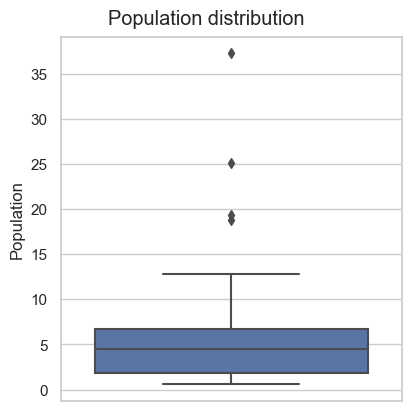

In [17]:
ncols = 1
nrows = 1

fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    sharey=True,
    sharex=True,
    constrained_layout=True,
    figsize=(4 * ncols, 4 * nrows)
)

fig.suptitle('Population distribution')
axs.set_xlabel('')
axs.set_ylabel('Population (millions)')

sns.boxplot(y=df['Population'] / 1000000, ax=axs)
    
plt.show()

This plot immediately shows:
- The median lower than 5 million;
- Half the states are between 2 and 7 million;
- Some population outliers;
- The wiskers shows the range of the bulk of the data.

### Frequency tables and histograms

- A frequency table of a variable divides up the variable range into equally spaced segments;
- Tell how many values fall within each segment.

In [18]:
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

- The least populated state have 526935.67 people;
- The most populated have 37253956.0;
- Its important to include the empity bins;
- The fact that there are no values in those bins is useful information;
- If the bins are too large important features of distribution are obscured;
- If the bins are too small that result is too granular and its not posible to see the big picture.

c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


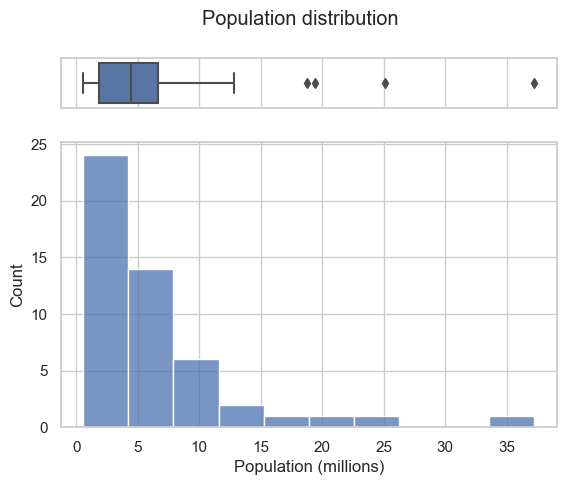

In [19]:
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)}
)

fig.suptitle('Population distribution')

sns.boxplot(x=df['Population'] / 1000000, ax=ax_box)
sns.histplot(x=df['Population'] / 1000000, bins=10, ax=ax_hist)

ax_box.set(xlabel='')
ax_hist.set(xlabel='Population (millions)')

plt.show()

- Empty bins are included;
- Bins are equal width;
- Number of bins is up to the user;
- Bars are contignous;

### Density plots and estimates

- Related to the histogram but shows the distribution of the data values as a continuous line;
- Can be tought as a smoothed histogram;
- Computed throught kernel densiy estimate

c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


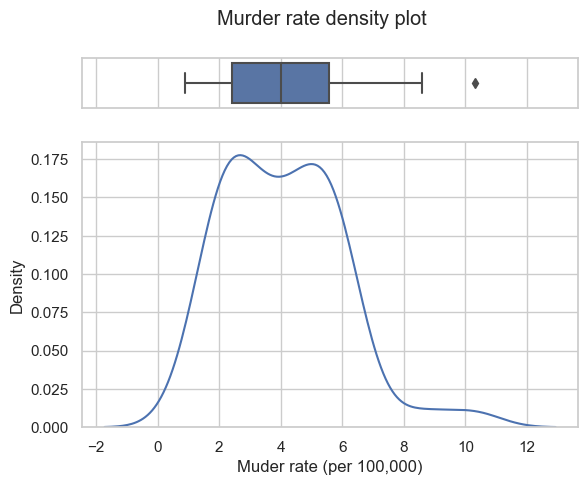

In [20]:
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)}
)

fig.suptitle('Murder rate density plot')

sns.boxplot(x=df['Murder.Rate'], ax=ax_box)
sns.kdeplot(df['Murder.Rate'], ax=ax_hist)

ax_box.set(xlabel='')
ax_hist.set(xlabel='Muder rate (per 100,000)')

plt.show()

c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


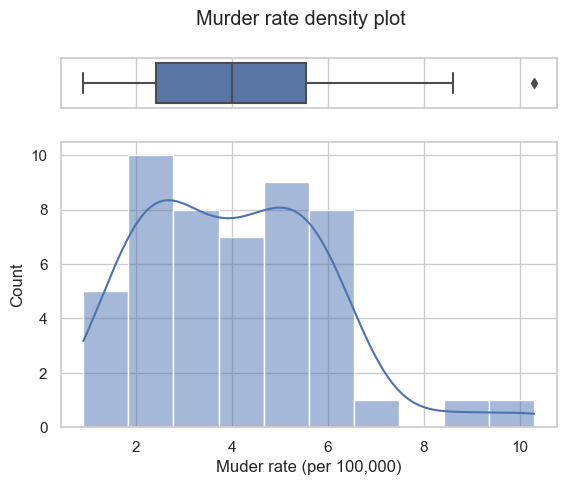

In [21]:
fig, (ax_box, ax_hist) = plt.subplots(
    2,
    sharex=True,
    gridspec_kw={"height_ratios": (.15, .85)}
)

fig.suptitle('Murder rate density plot')

sns.boxplot(x=df['Murder.Rate'], ax=ax_box)
sns.histplot(df['Murder.Rate'], kde=True, bins=10, ax=ax_hist)

ax_box.set(xlabel='')
ax_hist.set(xlabel='Muder rate (per 100,000)')

plt.show()

#### Key ideas
- A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of distribution of the data at glance;
- A frequency table is a tabular version of the frequency counts found in a histogram;
- A box plot gives the quick sense of the distribution of the data; often used on a side-by-side display for comparison;
- A density plot is a smoothed version of a histogram; it requires function to estimate a plot based on the data.

## Exploring binary and categorical data

### Key terms for exploring categorical data
- Mode: The most commonly occurring category or value in the data set;
- Expected value: When the categories can be associated with a numeric value, this gives an average value based on a category's probability of occurrence. Is calculated as follows:
    1. Multiply each outcome by it's probability of occurrence;
    2. Sum hese values.
- Bar charts: The frequency or proportion for each category plotted as bars;
- Pie charts: The frequency or proportion for each category plotted as wedges in a pie.

To summary a binary variable or categorical variable with few categories is easy as figure out the proportions of of the categories.

In [22]:
df = pd.read_csv('../data/dfw_airline.csv')
df.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: >

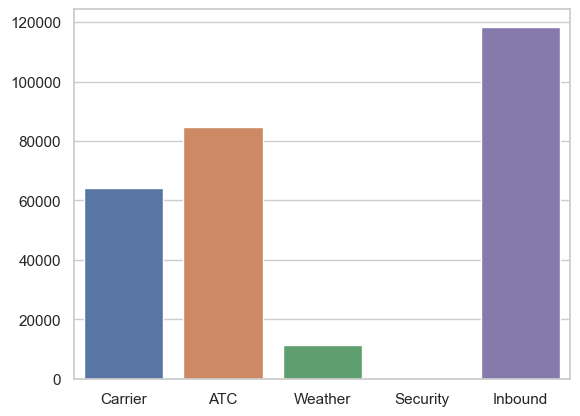

In [23]:
sns.barplot(df)

### Key terms

#### Mode

Is the value - or values in the case of a tie - that appears most often in the data.

#### Expected Value

A summed summary of the data in a single value iwch is a form of weighted mean, in which the weights are probabilities:

1. Multiply each outcome by its probability of occurrence;
2. Sum these values.

#### Probability
A probability of a value occurring. The proportion of times it will occur if the situation could be repeated over and over.

### Key ideas

- Categorical data is typically summed up in proportions and can be visualized in a bar chart;
- Categories might represent distinct things, or numeric data that has been binned;
- Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels.

### Correlation

- Correlation among predictors and between predictors and target;
- Positively correlated if high values of X go with high values of Y and low values of X goes with low values of Y;
- If high values goes go with low values and vice versa, the variables are negatively correlated.

#### Key terms
- Correlation coefficient: A metric that measures the extend to which numeric variables are associated with one another (from -1 to 1);
- Correlation matrix: A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables;
- Scatterplot: A plot in which the x-axis is the value of one variable and the y-axis the value of another.

#### Correlation coefficient

$$
    r = \frac{
        \sum_{i = 1}^n{(x_i - \bar{x})(y_i - \bar{y})}
    }{
        (n - 1)s_x s_y
    }
$$

If the association with variables are not linear the correlation coefficient may noy be a useful metric.

A correlation matrix shows the correlation between multiple variables.

In [24]:
sp500_sym = pd.read_csv('../data/sp500_sectors.csv')
sp500_px = pd.read_csv('../data/sp500_data.csv', index_col=0)

# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


Is possible to show the same correlation in a plot to display the relationship.

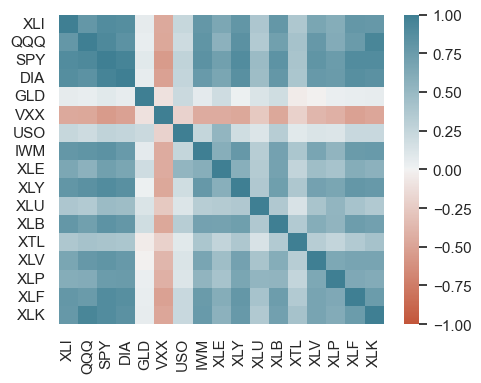

In [25]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The correlation coefficient is sensitive to outliers.

### Scatterplots

A standart way to visualize the relationship between two measured data variables is with a scatterplot.

c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


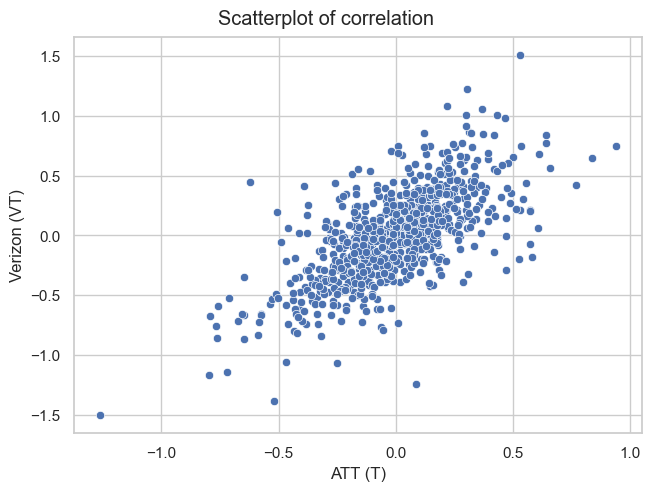

In [26]:
fig, ax = plt.subplots(
    ncols=1,
    nrows=1,
    constrained_layout=True,
)

fig.suptitle('Scatterplot of correlation')

sns.scatterplot(data=telecom, x='T', y='VZ', ax=ax)

ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VT)')

plt.show()

#### key ideas
- The correlation coefficient measures the extend to which two paired variables are associated with one another;
- The correlation coefficient is a standardized metric so that it always ranges from -1 to 1;
- A correlation coefficient of zero indicates no correlation, but be aware that random arrangements of data will produce both positeve and negative values for the correlation coefficient just by chance.

## Exploring two or more variables

- Contingency table: A tally of counts between two or mode categorical variables;
- Hexagonal binning: A plot of two numeric variables with the records binned into hexagons;
- Contour plot: a plot showing the density of two numeric variables like a topographical map;
- Violin plot: similar to a boxplot but showing the density estimate.

### Hexagonal binning and contours - numeric vs numeric data plotting

In [27]:
df = pd.read_csv('../data/kc_tax.csv')
df.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [28]:
kc_tax0 = df.loc[(df.TaxAssessedValue < 750000) &
                 (df.SqFtTotLiving > 100) &
                 (df.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

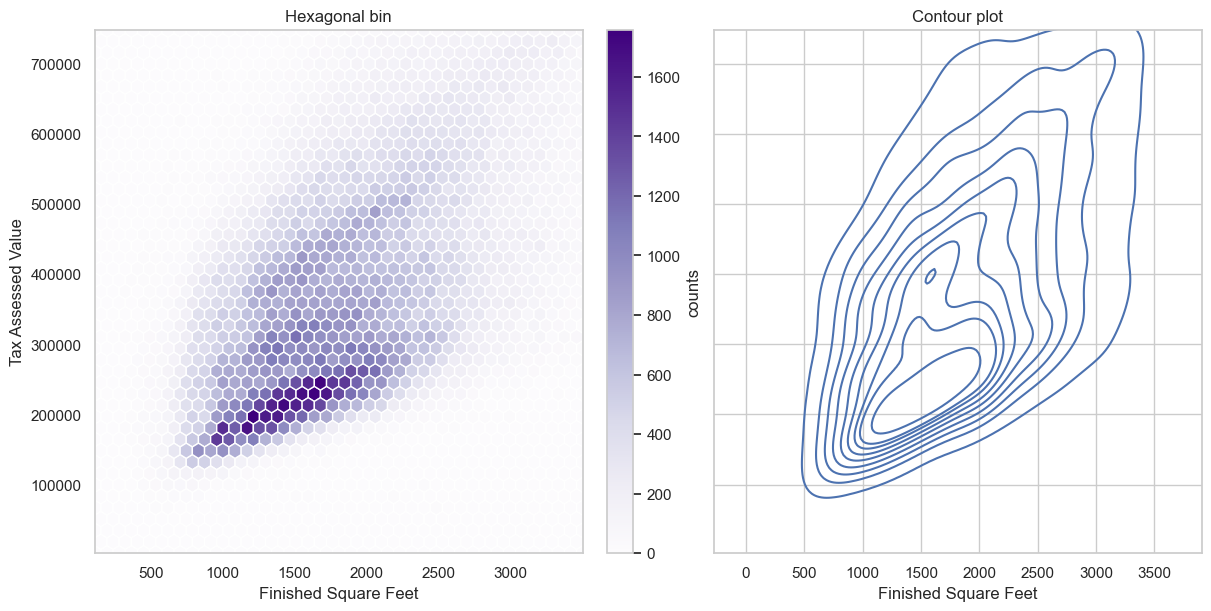

In [66]:
fig, ax = plt.subplots(
    ncols=2,
    nrows=1,
    constrained_layout=True,
    sharey=True,
    figsize=(12, 6),
)

xlim = kc_tax0['SqFtTotLiving'].min(), kc_tax0['SqFtTotLiving'].max()
ylim = kc_tax0['TaxAssessedValue'].min(), kc_tax0['TaxAssessedValue'].max()

hb = ax[0].hexbin(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', gridsize=40, cmap='Purples', edgecolors='white')
fig.colorbar(hb, ax=ax[0], label='counts')

ax[0].set_title('Hexagonal bin')
ax[0].set(xlim=xlim, ylim=ylim)
ax[0].set_xlabel('Finished Square Feet')
ax[0].set_ylabel('Tax Assessed Value')

ax[1].set_title('Contour plot')
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax[1])
ax[1].set_xlabel('Finished Square Feet')
ax[1].set_ylabel('Tax Assessed Value')


plt.show()

### Two categorical variables

- The useful way is to use a contingency table;
- Contingency tables can look at counts and percentages.

In [88]:
df = pd.read_csv('../data/lc_loans.csv')
df.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [89]:
crosstab = df.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [92]:
perc_crosstab = crosstab.copy().loc['A':'G',:]
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [93]:
perc_crosstab.loc[:,'Charged Off':'Late'] = perc_crosstab.loc[:,'Charged Off':'Late'].div(perc_crosstab['All'], axis=0)
perc_crosstab['All'] = perc_crosstab['All'] / sum(perc_crosstab['All'])
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### Categorical and numerical data

- Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable;
- Violin plot is an enhanced version of the boxplot.

In [94]:
df = pd.read_csv('../data/airline_stats.csv')
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

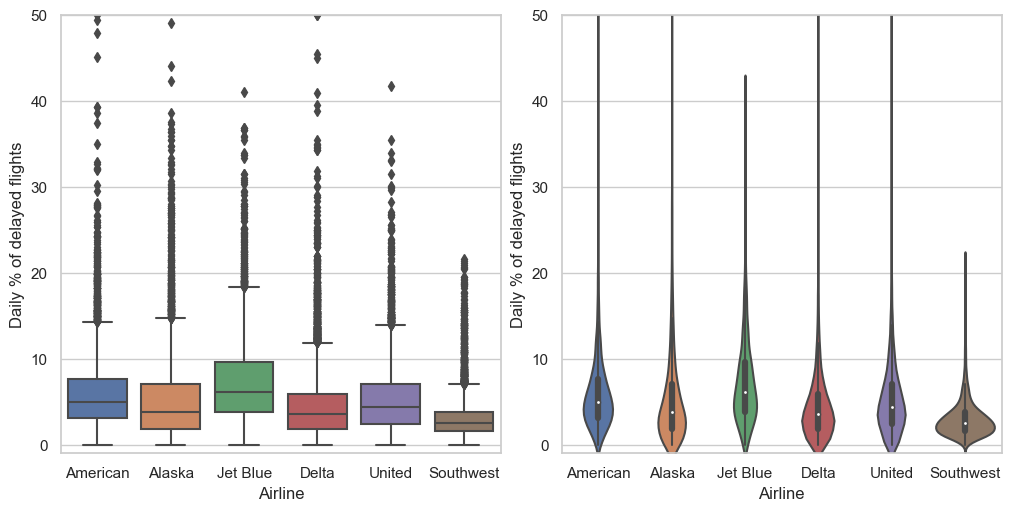

In [107]:
fig, ax = plt.subplots(
    ncols=2,
    nrows=1,
    constrained_layout=True,
    sharey=False,
    figsize=(10, 5),
)


sns.boxplot(data=df, x='airline', y='pct_atc_delay', ax=ax[0])
sns.violinplot(data=df, x='airline', y='pct_atc_delay', ax=ax[1])


for i in range(2):
    ax[i].set(ylim=(-1, 50))
    ax[i].set_xlabel('Airline')
    ax[i].set_ylabel('Daily % of delayed flights')

plt.show()

### Visualizing multiple variables
- Use the charts above extended through a notion of conditioning.

c:\Users\alvar\miniconda3\envs\ds-min\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


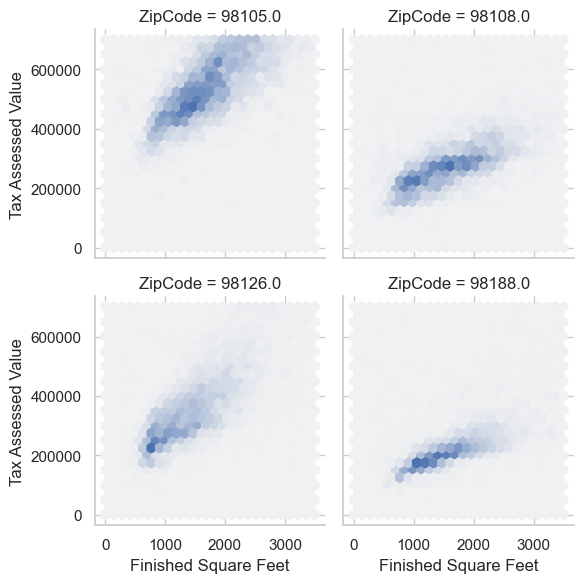

In [117]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
#g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

### Key ideas
- Hexagonal binning and contour plots are useful tools that permit graphical examination of two numeric variables at a time, without being overwhelmed by huge amounts of data;
- Contingency tables are the standart tool for looking at the counts at of two categorical variables;
- Boxplots and violin plots allow you to plot a numeric variable against a categorical variable.